In the sequel we demonstrate with a simple task of learning a one dimensional parabola the way how models are built within Keras for the deep heding or deep portfolio optimization task:

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from tensorflow.keras.backend import constant
from tensorflow.keras import optimizers

from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import initializers
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt

In [2]:
N = 1 # number of NN
m = 1 # dimension of input and output
d = 3 # number of layers 
n = 32  # nodes in the first but last layers

# architecture is the same for all networks
layers = []
for j in range(N):
    for i in range(d):
        if i < d-1:
            nodes = n
            layer = Dense(nodes, activation='tanh',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        else:
            nodes = m
            layer = Dense(nodes, activation='linear', trainable=True,
                          kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                          bias_initializer='random_normal',
                          name=str(i)+str(j))
        layers = layers + [layer]

In [3]:
x = Input(shape=(m,))

inputs = [x]

for j in range(N):
    strategy = x
    for k in range(d):
        strategy= layers[k+(j)*d](strategy) # strategy at j is the hedging strategy at j , i.e. the neural network g_j

inputs = inputs
outputs= strategy

model = Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
00 (Dense)                   (None, 32)                64        
_________________________________________________________________
10 (Dense)                   (None, 32)                1056      
_________________________________________________________________
20 (Dense)                   (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [21]:
Ktrain = 2*10**4

xtrain = np.random.normal(0,1,(Ktrain,1))
ytrain = xtrain**2

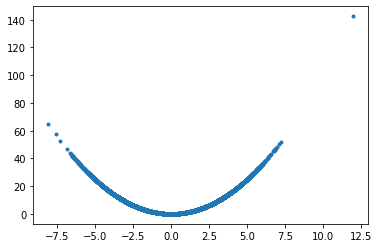

In [16]:
plt.plot(xtrain,ytrain,'.')
plt.show()

In [17]:
# train the network
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
 model.fit(x=xtrain,y=ytrain, epochs=10,verbose=True)

Train on 20000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 44us/sample - loss: 6.4240
Epoch 2/10
20000/20000 [==============================] - 1s 43us/sample - loss: 3.2621
Epoch 3/10
20000/20000 [==============================] - 1s 41us/sample - loss: 2.1900
Epoch 4/10
20000/20000 [==============================] - 1s 41us/sample - loss: 1.6690
Epoch 5/10
20000/20000 [==============================] - 1s 41us/sample - loss: 1.3518
Epoch 6/10
20000/20000 [==============================] - 1s 63us/sample - loss: 1.13070s 
Epoch 7/10
20000/20000 [==============================] - 1s 48us/sample - loss: 0.9761
Epoch 8/10
20000/20000 [==============================] - 1s 45us/sample - loss: 0.8694
Epoch 9/10
20000/20000 [==============================] - 1s 44us/sample - loss: 0.7920
Epoch 10/10
20000/20000 [==============================] - 1s 52us/sample - loss: 0.7356


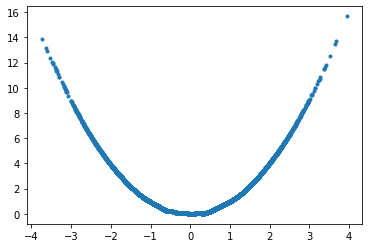

In [20]:
Ktest = 2*10**4

xtest = np.random.normal(0,1,(Ktest,1))
ytest = xtest**2


plt.plot(xtest,model.predict(xtest),'.')
plt.show()